In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the graph
G = nx.Graph()
G.add_edges_from([(1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'c'), (2, 'e'), (2, 'd'), (3, 'd'), (3, 'c'),
                 (3, 'd'),(4, 'a'), (4, 'e'), (5, 'a'), (5, 'e')])

In [3]:
if nx.bipartite.is_bipartite(G):
    left, right = nx.bipartite.sets(G)
else:
    print("this graph is not bipartite")

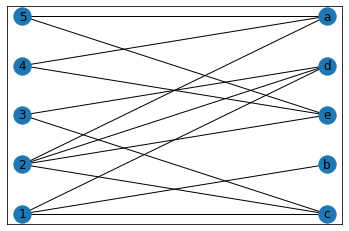

In [4]:
# Decides positioning of the graph
pos = nx.bipartite_layout(G, left)
nx.draw_networkx(G, pos = pos)

In [5]:
M = nx.max_weight_matching(G)
print(M)

{('e', 4), ('d', 3), (2, 'c'), (1, 'b'), ('a', 5)}


(-1.1, 1.1, -0.8249999999999998, 0.8249999999999998)

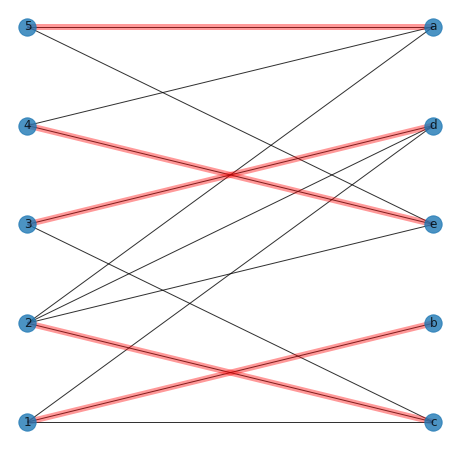

In [6]:
# k = dict(M)
plt.figure(figsize=(8,8))
nx.draw_networkx(G, alpha=0.8, pos = pos)
nx.draw_networkx_edges(G, pos = pos, edgelist = list(M), edge_color = 'r', alpha = 0.4, width = 6)
plt.axis('off')

In [7]:
G2 = nx.Graph()
G2.add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('e', 'a'), ('f', 'a'),
                  ('g', 'b'), ('h', 'c'), ('i', 'd'), ('j', 'e'), ('f', 'h'), ('h', 'j'),
                  ('j', 'g'), ('g', 'i'), ('i', 'f'), ('j', 'i'), ('j', 'd'), ('d', 'g')])

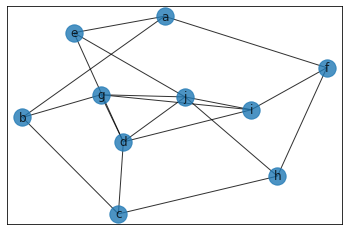

In [8]:
pos = nx.spring_layout(G2)
nx.draw_networkx(G2, alpha = 0.8, pos = pos)

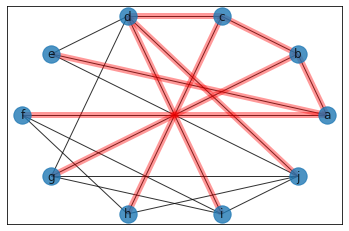

In [9]:
# Minimum spanning tree
T = nx.minimum_spanning_tree(G2)
ep = [e for e in T.edges()] # creating a list of tree edges

pos = nx.circular_layout(G2)

nx.draw_networkx(G2, alpha=0.8, pos = pos)

nx.draw_networkx_edges(G2, pos, edgelist = ep, edge_color = 'r', alpha = 0.4, width = 6)

In [10]:
cliques = list(nx.find_cliques(G2))
max_clique = max(cliques, key = len)

In [11]:
cliques

[['j', 'd', 'e'],
 ['j', 'd', 'i', 'g'],
 ['j', 'h'],
 ['c', 'd'],
 ['c', 'h'],
 ['c', 'b'],
 ['b', 'g'],
 ['b', 'a'],
 ['f', 'i'],
 ['f', 'a'],
 ['f', 'h'],
 ['a', 'e']]

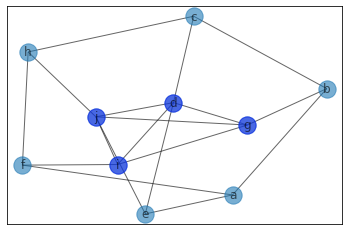

In [12]:
pos = nx.spring_layout(G2)
nx.draw_networkx(G2, pos = pos, alpha = 0.6)
nx.draw_networkx_nodes(G2, pos, nodelist = max_clique, node_color = 'b', alpha = 0.4, width = 6)

In [13]:
G3 = nx.karate_club_graph()

In [14]:
G3 = nx.convert_node_labels_to_integers(G3, first_label = 1)

In [15]:
degree_cent = nx.degree_centrality(G3)

In [16]:
degree_cent

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 20: 0.09090909090909091,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 24: 0.15151515151515152,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 27: 0.06060606060606061,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 34: 0.5151515151515151}

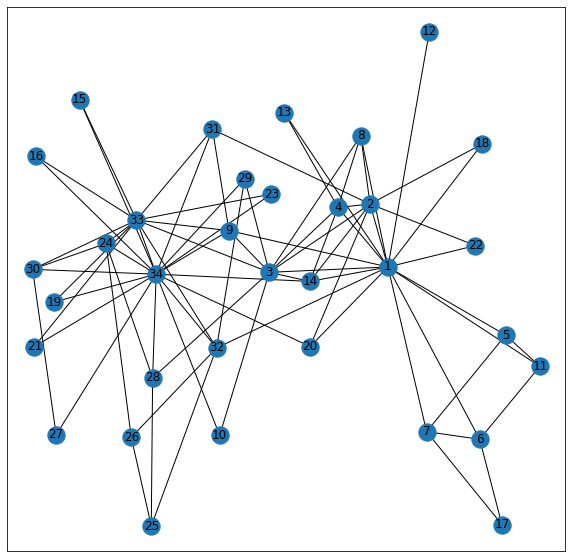

In [17]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G3, k = 0.6) # k = how much edge length in spring layout
nx.draw_networkx(G3, pos)

In [18]:
nx.average_shortest_path_length(G3)

2.408199643493761

In [19]:
nx.diameter(G3)

5

In [20]:
nx.transitivity(G3) #global clustering coefficient - how many neighbours of A are neighbours of each other? is the
# local clustering coefficient. Take average of all locals to get global
# Transitivity is like global clustering coeff but the nodes also have many neighbours

0.2556818181818182

In [21]:
nx.average_clustering(G3) # much higher than transitivity

0.5706384782076823

In [22]:
nx.density(G3)

0.13903743315508021

In [23]:
aa = nx.closeness_centrality(G3)
from operator import itemgetter
sorted(aa.items(), key = itemgetter(1), reverse = True)

[(1, 0.5689655172413793),
 (3, 0.559322033898305),
 (34, 0.55),
 (32, 0.5409836065573771),
 (9, 0.515625),
 (14, 0.515625),
 (33, 0.515625),
 (20, 0.5),
 (2, 0.4852941176470588),
 (4, 0.4647887323943662),
 (28, 0.4583333333333333),
 (31, 0.4583333333333333),
 (29, 0.4520547945205479),
 (8, 0.44),
 (10, 0.4342105263157895),
 (24, 0.39285714285714285),
 (6, 0.38372093023255816),
 (7, 0.38372093023255816),
 (30, 0.38372093023255816),
 (5, 0.3793103448275862),
 (11, 0.3793103448275862),
 (18, 0.375),
 (22, 0.375),
 (25, 0.375),
 (26, 0.375),
 (13, 0.3707865168539326),
 (15, 0.3707865168539326),
 (16, 0.3707865168539326),
 (19, 0.3707865168539326),
 (21, 0.3707865168539326),
 (23, 0.3707865168539326),
 (12, 0.36666666666666664),
 (27, 0.3626373626373626),
 (17, 0.28448275862068967)]

In [24]:
nx.eigenvector_centrality(G3)

{1: 0.3554834941851943,
 2: 0.2659538704545025,
 3: 0.31718938996844476,
 4: 0.2111740783205706,
 5: 0.07596645881657382,
 6: 0.07948057788594247,
 7: 0.07948057788594247,
 8: 0.17095511498035434,
 9: 0.2274050914716605,
 10: 0.10267519030637758,
 11: 0.07596645881657381,
 12: 0.05285416945233648,
 13: 0.08425192086558088,
 14: 0.22646969838808148,
 15: 0.10140627846270832,
 16: 0.10140627846270832,
 17: 0.023634794260596875,
 18: 0.09239675666845953,
 19: 0.10140627846270832,
 20: 0.14791134007618667,
 21: 0.10140627846270832,
 22: 0.09239675666845953,
 23: 0.10140627846270832,
 24: 0.15012328691726787,
 25: 0.05705373563802805,
 26: 0.05920820250279008,
 27: 0.07558192219009324,
 28: 0.13347932684333308,
 29: 0.13107925627221215,
 30: 0.13496528673866567,
 31: 0.17476027834493085,
 32: 0.19103626979791702,
 33: 0.3086510477336959,
 34: 0.373371213013235}

In [25]:
nx.betweenness_centrality(G3)

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

In [26]:
def Clique():
    clique = list(nx.find_cliques(G3))
    Max_clique = max(clique, key = len)
    print(Max_clique)
    node_color = [(0.5, 0.5, 0.5) for v in G3.nodes()]# Tuple of RGB value - from matplotlib
    for i, v in enumerate(G3.nodes()):
        if v in Max_clique:
            node_color[i] = (0.1, 0.5, 0.1)
    nx.draw_networkx(G3, node_color = node_color, pos = pos, alpha = 0.5, with_labels = False)
    plt.show()

[1, 2, 3, 4, 8]


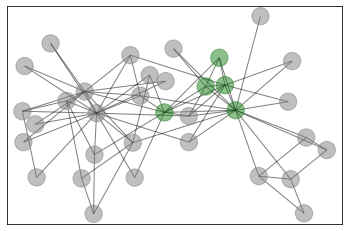

In [27]:
Clique()

In [28]:
# https://matplotlib.org/3.2.1/api/colors_api.html